<a href="https://colab.research.google.com/github/LeilaYK/Classifying_Shapes/blob/main/classifying_shapes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

In [2]:
os.getcwd()

'/content'

In [3]:
os.listdir()

['.config', 'drive', 'sample_data']

In [4]:
path = './drive/MyDrive/CTS/train/'
os.listdir(path)

['circle057.png',
 'circle055.png',
 'circle060.png',
 'circle052.png',
 'circle058.png',
 'circle059.png',
 'circle056.png',
 'circle054.png',
 'circle051.png',
 'circle053.png',
 'circle049.png',
 'circle050.png',
 'circle040.png',
 'circle041.png',
 'circle044.png',
 'circle048.png',
 'circle047.png',
 'circle046.png',
 'circle043.png',
 'circle045.png',
 'circle042.png',
 'circle035.png',
 'circle037.png',
 'circle038.png',
 'circle033.png',
 'circle039.png',
 'circle034.png',
 'circle032.png',
 'circle036.png',
 'circle030.png',
 'circle031.png',
 'circle025.png',
 'circle028.png',
 'circle029.png',
 'circle026.png',
 'circle027.png',
 'circle020.png',
 'circle024.png',
 'circle022.png',
 'circle021.png',
 'circle023.png',
 'circle017.png',
 'circle016.png',
 'circle018.png',
 'circle019.png',
 'circle014.png',
 'circle015.png',
 'circle012.png',
 'circle013.png',
 'circle006.png',
 'circle011.png',
 'circle007.png',
 'circle009.png',
 'circle010.png',
 'circle008.png',
 'circle00

In [5]:
full_names = os.listdir(path)
labels = [each.split('0')[0] for each in full_names]
file_id = [each.split('0')[1] for each in full_names]

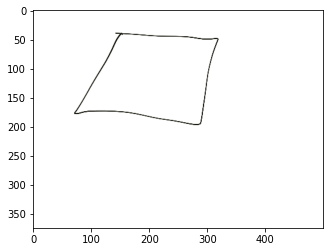

In [8]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

sample = random.choice(full_names)
image = mpimg.imread(path + sample)
plt.imshow(image)
plt.show()

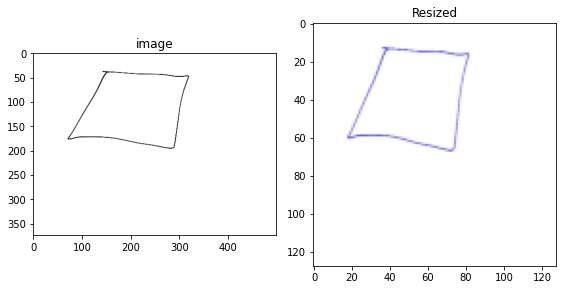

In [13]:
from skimage.transform import resize
resized = resize(image, (128, 128, 3))

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title("image")
ax[1].imshow(resized, cmap=plt.cm.gray)
ax[1].set_title("Resized")

fig.tight_layout()
plt.show()

In [15]:
from tqdm.notebook import tqdm
from skimage.color import rgb2gray
import numpy as np

images = []
bar_total = tqdm(full_names)
for file in bar_total:
  image = mpimg.imread(path + file)
  images.append(resize(image, (128, 128, 3)))

images = np.array(images)

In [16]:
images.shape, labels[:3]

((240, 128, 128, 3), ['circle', 'circle', 'circle'])

In [17]:
images[:3]

array([[[[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        ...,

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]],


       [[[1., 1., 1.],
         [1., 1., 1.],
         [1., 

In [18]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(labels)
labels_encoded = encoder.transform(labels)
labels_encoded[:3], encoder.classes_

(array([2, 2, 2]), array(['Square', 'Triangle', 'circle'], dtype='<U8'))

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images, labels_encoded,\
                                                    test_size=0.2, random_state=6,\
                                                    stratify=labels_encoded)
X_train.shape, X_test.shape

((192, 128, 128, 3), (48, 128, 128, 3))

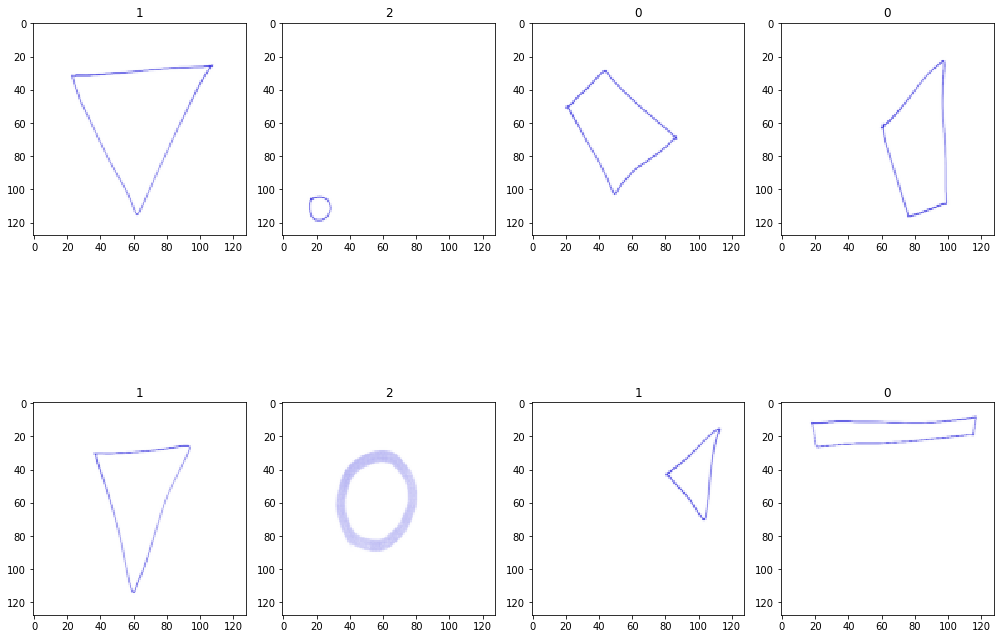

In [21]:
samples = random.choices(population=range(0, 192), k=8)

plt.figure(figsize=(14, 12))
for idx, n in enumerate(samples):
  plt.subplot(2, 4, idx+1)
  plt.imshow(X_train[n], cmap='Greys',
             interpolation='nearest')
  plt.title(y_train[n])

plt.tight_layout()
plt.show()

In [22]:
from tensorflow.keras import layers, models

model = models.Sequential([
                           layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
                           layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
                           layers.Dropout(0.25),

                           layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
                           layers.MaxPooling2D(pool_size=(2, 2)),
                           layers.Dropout(0.25),

                           layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
                           layers.MaxPooling2D(pool_size=(2, 2)),
                           layers.Dropout(0.25),

                           layers.Flatten(),
                           layers.Dense(512, activation='relu'),
                           layers.Dropout(0.25),
                           layers.Dense(2, activation='softmax')                          

])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 63, 63, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 31, 31, 64)        3

In [24]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [31]:
import time

start_time = time.time()
hist = model.fit(X_train.reshape(192, 128, 128, 3), y_train,
                 epochs=5, verbose=1,
                 validation_data = (X_test.reshape(48, 128, 128, 3), y_test))
print("fit time: ", time.time() - start_time)

Epoch 1/5
6/6 [==============================] - 0s 36ms/step - loss: nan - accuracy: 0.3333 - val_loss: nan - val_accuracy: 0.3333
Epoch 2/5
6/6 [==============================] - 0s 28ms/step - loss: nan - accuracy: 0.3333 - val_loss: nan - val_accuracy: 0.3333
Epoch 3/5
6/6 [==============================] - 0s 26ms/step - loss: nan - accuracy: 0.3333 - val_loss: nan - val_accuracy: 0.3333
Epoch 4/5
6/6 [==============================] - 0s 25ms/step - loss: nan - accuracy: 0.3333 - val_loss: nan - val_accuracy: 0.3333
Epoch 5/5
6/6 [==============================] - 0s 24ms/step - loss: nan - accuracy: 0.3333 - val_loss: nan - val_accuracy: 0.3333
fit time:  0.8467574119567871


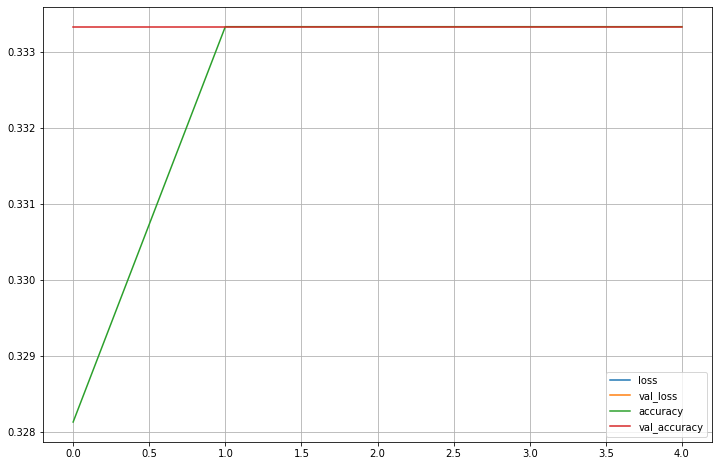

In [29]:
plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']
plt.figure(figsize=(12, 8))

for each in plot_target:
  plt.plot(hist.history[each], label=each)

plt.legend()
plt.grid()
plt.show()